<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />This tutorial by Xiaozhou Li is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
All code examples are also licensed under the [MIT license](http://opensource.org/licenses/MIT).

# 1D Elliptic Equation
The first tast of this tutorial is solving the 1D eplliptic equation with Dirichlet boundary condition:
\begin{align}
   -\frac{d}{dx}\left(c(x)\frac{d u(x)}{dx}\right) & = f(x),\,\, a < x < b \\
   u(a) = g_a,\,\,u(b) & = g_b.
\end{align}
- The Elliptic equation is a easy example to look at the basic idea of the finite element methods.
- Other numerical methods for solving partial differential equations, such as finite difference methods, finite volume methods, discontinuous Galerkin methods, etc., each method has its advantages for particular problems.
- For example, the discontinuous Galerkin (DG) methods is the most popular methods used to solve hyperbolic equations, the details can be found in the [DG tutorial](http://).

## Finte Element Method
### Weak Formulation
To derive the weak formulation of the finite element methods, we first multiply a function $v(x)$ on both sides of the original equation and take the integration over interval $[a, b]$:
\begin{equation}
    \int_a^b \left(-\frac{d}{dx}\left(c(x)\frac{d u(x)}{dx}\right)\right)  = \int_a^b f(x)v(x),
\end{equation}
where $u(x)$ is called a trail function and $v(x)$ is called a test function.

Then, using the integration by parts, we obtain
\begin{equation}
    \int_a^b c(x) u'(x)v'(x) dx + c(b)u'(b)v(b) - c(a)u'(a)v(a) = \int_a^b f(x)v(x) dx.
\end{equation}
Here, since the Dirichlet boundary condtion gives $u(a) = g_a$ and $u(b) = g_b$ at the boundary points $x = a$ and $x = b$, we can choose the test function $v(x)$ such that $v(a) = v(b) = 0$.

Hence, we have 
\begin{equation}
    \int_a^b c(x) u'(x)v'(x) dx = \int_a^b f(x)v(x) dx.
\end{equation}
By introducing the concept of Sobolev space, we can define the follows weak formulation.

__Weak Formulation:__ 

Let 
\begin{equation}
    a(u, v)= \int_\Omega c u'v' dx\,\,\text{and }\, (f, v)=\int_Omega fv dx, 
\end{equation}
find $u \in H^1(\Omega)$ such that 
\begin{equation}
    a(u, v) = (f, v)
\end{equation}
for any $v \in H_0^1(\Omega)$ where $\Omega = (a, b)$. 

### Weak Galerkin Formulation
However, the above Sobolev space $H^1(\Omega)$ is a __infinite__ dimensional space.  To numerically solve the solution, we usually have to consider a __finite__ dimensional approximation subspace $V_h$ belong to $H^1(\Omega)$.

__Weak Galerkin Formulation:__ 

Find $u_h \in V_h$ such that 
\begin{equation}
    a(u_h, v_h) = (f, v_h)
\end{equation}
for any $v_h \in V_h$ where $\Omega = (a, b)$. 

### Polynomial Approximation Space
A common way to construct the approximation space $V_h$ is considering a partition $\left\{x_j\right\}_0^N$ of $[a, b]$, such that 
\begin{equation}
    a = x_0 < x_1 < \ldots < x_{N-1} < x_N = b,
\end{equation}
where $I_j = [x_{j-1}, x_j]$ denotes the $j$th element, $j = 1,\ldots,N$.

Define the polynomial finite element space:
\begin{equation}
    V_h = \left\{v \in \mathcal{C}[a,b]:  v|_{I_j} \in \mathbb{P}^k(I_j),\,\, j = 1,\ldots,N\right\}
\end{equation}
- $V_h$ is actually a piecewise polynomial space based on the generated mesh.
- In the practical engineering, the most common way is using the linear function ($k = 1$). 

### More Reference
- For the detail of Sobolev space, one can refer to any finite element methods book, such as 
    - Susanne C. Brenner and L. Ridgway Scott. _The mathematical theory of finite element methods_, volume 15 of Texts in Applied Mathematics. Springer, New York, third edition, 2008. 
    - Philippe G. Ciarlet. _The finite element method for elliptic problems_, volume 40 of Classics in Applied Mathematics. Society for Industrial and Applied Mathematics (SIAM), Philadelphia, PA, 2002.

## Implementation
In general, there are two ways to implement the finite element method:
- __Loop of basis functions:__ We write the approximation $u_h$ as 
\begin{equation}
    u_h(x) = \sum\limits_{j = 1}^{N_b}u_j\phi_j(x)
\end{equation}
where $N_b$ is the number of basis functions.  The implementation has main loops like:
```python
    for j in range(Nb_trial): 
        for i in range(Nb_test):
            # main code (global integration: [a, b])
```
This approach has the follwing features:
    - It is a directly translation from the weak Galerkin formulation.
    - Degree of freedom is exactly $N_b$, and the unknown $\left\{u_j\right\}_{j=1}^{N_b}$ are independent.
    - Assembly of matrices (vectors) is straightforward.
    - The integrals is on the global interval $[a,b]$, each integration $\int_a^b c(x)\phi_j(x)\phi_i(x)dx$ represents a unique entry of the global matrix.
    - May be a little complicated for unstructured meshes in multi-dimensional cases.

- __Loop of elements:__ We write the approximation $u_h$ as 
\begin{equation}
    u_h(x) = \sum\limits_{n = 1}^N\sum\limits_{i=1}^{N_{lb}}u_{n,i}\phi_{n,i}(x)
\end{equation}
where $N_{lb}$ is the number of local basis function on each element.  The implementation has main loops like:
```python
    for n in range(number_of_elements): 
        for alpha in range(Nlb_trial):
            for beta in range(Nlb_test):
                # main code (local integration: [x_n, x_n+1])
```
This approach has the follwing features:
    - Degree of freedom is not $N\times N_{lb}$, and the unknown $\left\{u_{i,n}\right\}$ are dependent.
    - Assembly of matrices (vectors) needs some derivation, there is a local assembly to global assembly process.  
    - The integral is on local element $I_n$ instead of the whole domain, each integration $\int_{I_n} c(x)\phi_{n,\alpha(x)}\phi_{n,\beta(x)}dx$ needs to add to correspond entry of the global matrix based on certain information.
    
__Note:__ It is rather a perference between the above two ways.  There is no definite answer which one is better.  Personally, I perfer the first way for  Isogeometric Analysis (IGA) methods, and the second way for DG methods.

In [1]:
# environment setting, before any codes
import numpy as np
import numpy.polynomial.legendre as npleg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

### Mesh information matrices
The first step is storing the mesh information for later computing usage.  The mesh information we needed is follows:  
- Define global indices for all the mesh elements and mesh nodes. Let $N$ denote the number of mesh elements and $N_m$ denote the number of mesh nodes. Here $N_m = N + 1$.
- Define matrix $P$ to be an information matrix consisting of the coordinates of all mesh nodes.  The $j$th column of $P$ is the coordinate of the $j$th finite element node.
- Define matrix $T$ to be an information matrix consisting of the global node indices of the mesh nodes of all the mesh elements.  The $n$th column of $T$ stores the global indices of the vertices of the $n$th element. 

Note:
- The input information is the left/right boundary and the number of elements
```python
    def generate_PT_1D(left_boundary, right_boundary, number_of_elements)
```
- Therefore $P[T[i,j]]$ gives the coordinate of the $i$th vertice on the $j$th element.
- This step is independent with the type of numerical methods, and for unstructure meshs in multi-dimensional space, this step is rather complicated.
- For one dimensional mesh, this step is very simple:
    - $P = [x_0, x_1, \ldots, x_N]$;
    - $T = \text{index}\left(\left[\begin{array}{cccc}x_0, & x_1, & \ldots, & x_{N-1}\\
                               x_1, & x_2, & \ldots, & x_N\end{array}\right]\right) = \left[\begin{array}{cccc}0, & 1, & \ldots, & N-1\\
                           1, & 2, & \ldots, & N\end{array}\right]$.

In [2]:
def generate_PT_1D(left_boundary, right_boundary, number_of_elements):
    P = np.linspace(left_boundary, right_boundary, number_of_elements+1)
    T = np.zeros([2, number_of_elements], dtype=int)
    for j in range (number_of_elements):
        T[0,j] = j
        T[1,j] = j+1
    return P, T

### Finite element information matrices
The above mesh information matrices $P$ and $T$ are for the mesh nodes. We also need similar finite element information matrices $P_b$ and $T_b$ for the finite elements nodes, which are the nodes corresponding to the finite element basis functions.
- Let $N_b$ denote the total number of the finite element basis functions (= the number of unknowns = the total number of the finite element nodes). Here $N_b = N + 1$.
- Define matrix $P_b$ to be an information matrix consisting of the coordinates of all finite element nodes. The $j$th column of $P_b$ is the coordinate of the $j$th finite element node.
- Define matrix $T_b$ to be an information matrix consisting of the global node indices of the finite element nodes of all the mesh elements.  The $n$th column of $T$ stores the global indices of the nodes of the $n$th element.

Notes:
- The input information is the mesh information matrices $P$ and $T$, and the type of basis functions 
```python
    def generate_NbPbTb_1D(P, T, basis_type)
```
- Unlike the mesh information matrices $P$ and $T$, the finite element information matrices $P_b$ and $T_b$ are dependent on the type of basis functions.  They can be quite complicated, especially for non-nodal basis functions.
- One has to update the code based on the type of basis functions.
- For simplicity, in this tutorial, we only consider the linear and quadratic functions.

__Linear basis function:__
- This is the simplest case (also the most popular one), the $P_b$ and $T_b$ are the same as the mesh information matrices $P$ and $T$.

__Quadratic basis function:__
- For using quadratic basis function, on each element, besides two vertices one still needs another node (the middle point of the element).  That is, let $x_{n+\frac{1}{2}} = \frac{1}{2}\left(x_n + x_{n+1}\right)$, the $P_b$ matrix is given by
\begin{equation} 
    P_b = [x_0, x_{\frac{1}{2}}, x_1, \ldots, x_N],
\end{equation}
with $size(P_b) = 2N+1 = 2*size(P)-1$.
- For matrix $T_b$, on each element, we sort all the nodes in the order $x_n, x_{n+1}, x_{n+\frac{1}{2}}$.  Then, we have 
\begin{equation}
    T_b = \text{index}\left(\left[\begin{array}{cccc}x_0, & x_1, & \ldots, & x_{N-1}\\
                               x_1, & x_2, & \ldots, & x_N \\
                               x_{\frac{1}{2}}, & x_{\frac{3}{2}}, &\ldots, & x_{N-\frac{1}{2}}\end{array}\right]\right) = \left[\begin{array}{cccc}0, & 2, & \ldots, & 2N-2\\
                           2, & 4, & \ldots, & 2N \\ 1, & 3, &\ldots, & 2N-1\end{array}\right]
\end{equation}

In [3]:
def generate_NbPbTb_1D(P, T, basis_type):
    if (basis_type==101):
        Nb = np.size(P)
        Pb = np.copy(P)
        Tb = np.copy(T)
    elif (basis_type==102):
        Nb = 2*np.size(P)-1
        Pb = np.zeros(Nb)
        Pb[0::2] = P
        for i in range (np.size(P)-1):
            Pb[2*i+1] = 0.5*(Pb[2*i] + Pb[2*i+2])
        Tb = np.zeros([3,np.size(P)-1],dtype=int)
        Tb[0:2,:] = T*2
        Tb[2,:] = Tb[1,:]-1
    return Nb, Pb, Tb

In [31]:
# local debugging cell: generate_PT_1D, generate_NbPbTb_1D
left_boundary = 0
right_boundary = 1
number_of_elements = 10
P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

basis_type = 102
Nb, Pb, Tb = generate_NbPbTb_1D(P, T, basis_type)
#print (P); print (T); print (Nb); print (Pb); print (Tb)

### Local Basis Function
- For local basis functions, the first thing needs to know is the number of local basis functions, $N_{lb}$
```python
    def generate_Nlb(basis_type)
```
- Then, for each index of the basis, one needs the evaluation function for the value of the basis function and its derivatives.
```python
    def local_basis_1D(x, vertices, basis_type, basis_index, der_order)
```
- Aagin, one has to update the code once new basis type is added.

In [5]:
def generate_Nlb(basis_type):
    if (basis_type==101):
        Nlb = 2
    elif (basis_type==102):
        Nlb = 3
    return Nlb

def local_basis_1D(x, vertices, basis_type, basis_index, der_order):
    #basis_type==101: 1D linear basis functions
    #basis_type==102: 1D quadratic basis functions
    
    left = vertices[0]
    right = vertices[1]
    h = right - left
    if (basis_type==101):
        if (basis_index==0):
            if (der_order==0):
                r = (right - x)/h
            elif (der_order==1):
                r = -1/h
            elif (der_order>1):
                r = 0.
            else:
                print ("wrong der order")
        elif (basis_index==1):
            if (der_order==0):
                r = (x - left)/h
            elif (der_order==1):
                r = 1/h
            elif (der_order>1):
                r = 0
            else:
                print ("wrong der order")
    elif (basis_type==102):
        if (basis_index==0):
            if (der_order==0):
                r = 2*((x-left)/h)**2 - 3*(x-left)/h + 1
            elif (der_order==1):
                r = 4*(x-left)/h**2 - 3/h
            elif (der_order==2):
                r = 4/h**2 
            elif (der_order>2):
                r = 0
            else:
                print ("wrong der order")
        elif (basis_index==1):
            if (der_order==0):
                r = 2*((x-left)/h)**2 - (x-left)/h
            elif (der_order==1):
                r = 4*(x-left)/h**2 - 1/h
            elif (der_order==2):
                r = 4/h**2 
            elif (der_order>2):
                r = 0
            else:
                print ("wrong der order")
        elif (basis_index==2):
            if (der_order==0):
                r = -4*((x-left)/h)**2 + 4*(x-left)/h
            elif (der_order==1):
                r = -8*(x-left)/h**2 + 4/h
            elif (der_order==2):
                r = -8/h**2 
            elif (der_order>2):
                r = 0
            else:
                print ("wrong der order")
    return r

### Local Assembly
- Now, we process the key part of this implemenation, __local assembly__.  Basically, this process takes two steps:
    1. Computing the integral $\int_{I_n} c(x){\phi'_{n,\alpha}}(x){\phi'_{n,\beta}}(x)dx$
    2. Adding the integral value to the correspond entry of the global matrix.
- Note, it is simiar to deal with the source term and assemble the global vector.

#### Gauss Quadrature
- However, to compute the integration in general, one needs use numerical quadrature methods.  Here, we choose the popular Gauss quadrature:
    - For each element, we need the corresponding Gauss points and weights based on the element vertices.
    ```python 
        def generate_Gauss1D(vertices, Gauss_points_ref, Gauss_weights_ref)
    ```
    - One has to provide the number of Gauss quadrature points, $Gpn$, and the correspond Gauss points and weights on the reference interval $[-1,1]$.
    - In python, the Gauss-Legendre quadrature can be easily generated by
    ```python
        Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    ```

In [6]:
def generate_Gauss1D(vertices, Gauss_points_ref, Gauss_weights_ref):
    mid  = 0.5*(vertices[0] + vertices[1])
    scale = 0.5*(vertices[1] - vertices[0])
    return mid + scale*Gauss_points_ref, scale*Gauss_weights_ref

In [7]:
# local debugging cell: global testing part 1
# left, right boundary
left_boundary = 0
right_boundary = 1

# number of elements, also size(T[0])
number_of_elements = 4

# P, T matrice
P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

basis_type_trial = 102
basis_type_test = 102

# Nlb, number of local basis
Nlb_trial = generate_Nlb(basis_type_trial)
Nlb_test  = generate_Nlb(basis_type_test)
Nb_trial, Pb_trial, Tb_trial = generate_NbPbTb_1D(P, T, basis_type_trial)
Nb_test,  Pb_test,  Tb_test  = generate_NbPbTb_1D(P, T, basis_type_test)

# Gauss point number
Gpn = 6
Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
#Gauss_points, Gauss_weights = generate_Gauss1D([0,1], Gauss_points_ref, Gauss_weights_ref)

#### Assemble Matrix (diffusion term)
One needs:
- Define the coefficient function $c(x)$
```python
def coeff_fun(x)
```
- Computing the integral $\int_{I_n} c(x){\phi'_{n,\alpha}}(x){\phi'_{n,\beta}}(x)dx$
```python
def Gauss_int_1D_trial_test(Gpn, Gauss_points, Gauss_weights, \
                coeff_fun, vertices, \
                der_order_trial, basis_type_trial, basis_index_trial,\
                der_order_test,  basis_type_test,  basis_index_test)
```
    - Here, in the above implementation, we allow the trial and test functions can come from different approximation space.
- Assemble the global matrix
```python 
def assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, \
           P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
           basis_type_trial, der_order_trial, \
           basis_type_test, der_order_test)
```                       
    - The correspond global index is provided by the $T_b$ matrix.
    - __Important__: the __trial__ function contributes to the __column__ entry and the __test__ function contributes to the __row__ entry of the global matrix.
    - Here, the derivative order is $1$.

In [8]:
def coeff_fun(x):
    return np.exp(x) 

def Gauss_int_1D_trial_test(Gpn, Gauss_points, Gauss_weights, coeff_fun, vertices, \
                            der_order_trial, basis_type_trial, basis_index_trial, \
                            der_order_test,  basis_type_test,  basis_index_test):
    int_value = 0.
    for k in range (Gpn):
        int_value += Gauss_weights[k]*coeff_fun(Gauss_points[k])*\
                        local_basis_1D(Gauss_points[k],vertices, basis_type_trial, basis_index_trial, der_order_trial)*\
                        local_basis_1D(Gauss_points[k],vertices, basis_type_test, basis_index_test, der_order_test)
    return int_value

In [9]:
def assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, P, T,\
                       Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, der_order_trial, basis_type_test, der_order_test):
    A = np.zeros([Nb_test, Nb_trial])
    for n in range(number_of_elements):
        vertices = P[T[0,n]:T[1,n]+1]
        Gauss_points, Gauss_weights=generate_Gauss1D(vertices, Gauss_points_ref, Gauss_weights_ref)
        for alpha in range(Nlb_trial):
            for beta in range(Nlb_test):
                int_value=Gauss_int_1D_trial_test(Gpn, Gauss_points, Gauss_weights, coeff_fun, vertices, \
                                                    der_order_trial, basis_type_trial, alpha, \
                                                    der_order_test,  basis_type_test,  beta)
                A[Tb_test[beta,n],Tb_trial[alpha,n]] += int_value
    return A          

#### Assemble Vector (source term)
One needs:
- Define the source function $f(x)$
```python
def source_fun(x)
```
- Computing the integral $\int_{I_n} f(x){\phi_{n,\beta}}(x)dx$
```python
def Gauss_int_1D_source_test(Gpn, Gauss_points, Gauss_weights, \
                     source_fun, vertices, \
                     der_order_test,  basis_type_test,  basis_index_test)
```
- Assemble the global vector
```python 
def assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, \
                       basis_type_test, der_order_test)
```                       
Note: it is a rather a simple version of asseble matrix process.

In [10]:
def source_fun(x):
    #return 0.
    return -np.exp(x)*(np.cos(x)-2*np.sin(x)-x*np.cos(x)-x*np.sin(x))

def Gauss_int_1D_source_test(Gpn, Gauss_points, Gauss_weights, source_fun, vertices, \
                            der_order_test,  basis_type_test,  basis_index_test):
    int_value = 0.
    for k in range (Gpn):
        int_value += Gauss_weights[k]*source_fun(Gauss_points[k])*\
                        local_basis_1D(Gauss_points[k], vertices, basis_type_test, basis_index_test, der_order_test)
    return int_value

def assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, der_order_test):
    b = np.zeros(Nb_test)
    for n in range(number_of_elements):
        vertices = P[T[0,n]:T[1,n]+1]
        Gauss_points, Gauss_weights=generate_Gauss1D(vertices, Gauss_points_ref, Gauss_weights_ref)
        for beta in range(Nlb_test):
            int_value=Gauss_int_1D_source_test(Gpn, Gauss_points, Gauss_weights, source_fun, vertices, \
                                                der_order_test,  basis_type_test,  beta)
            b[Tb_test[beta,n]] += int_value
    return b

In [11]:
# local debugging cell: assemble_matrix_1D, assemble_vector_1D, global testing part 2
#print (Nb_trial, Nb_test, np.shape(Tb_trial), np.shape(Tb_test))
A = assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, 
                       P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, 1, basis_type_test, 1)
b = assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, 0)
#print (A)
#print (b)

### Treat Boundary Conditions
#### Boundary information matrix
To deal with the boundary conditions in a general struture, one needs store the boundary information matrix $boundarynodes$: 
- $boundarynodes[0,k]$ is the type of the $k$th boundary finite element node: Dirichlet, Neumann, Robin, etc.
- $boundarynodes[1,k]$ is the global node index of the kth boundary finite element node.
- Let $nbn$ denote the number of boundary finite element nodes.
- For more complicated methods, one may need to store more boundary information than the above.
```python
    def generate_boundarynodes_1D(Pb)
```

#### Dirichlet boundary conditions
- Define $g(x)$ to be the Dirichlet boundary function which satisfies $g(a)=g_a$ and $g(b)=g_b$.
- The Dirichlet boundary condition leads to the following equation:
\begin{align}
    u_h(a) & = \sum\limits_{n = 1}^N\sum\limits_{i=1}^{N_{lb}}u_{n,i}\phi_{n,i}(a) = g(a)\\
    u_h(b) & = \sum\limits_{n = 1}^N\sum\limits_{i=1}^{N_{lb}}u_{n,i}\phi_{n,i}(b) = g(b)
\end{align}
- However, only the coefficient of the Dirichlet boundary nodes have contribution to the final results:
    - Let $i = boundary[1,k]$, then $u_i = g(P_b[i])$, where $u_i$ is the $i$th unknown (global index).

In [12]:
def generate_boundarynodes_1D(Pb):
    nbn = 2
    boundarynodes = np.zeros([2,nbn],dtype=int)
    # boundarynodes[0,i] = 0, Dirichlet
    boundarynodes[1,0] = 0
    boundarynodes[1,1] = np.size(Pb)-1
    return nbn, boundarynodes

def Dirichlet_fun(x):
    if (x <= left_boundary+1.e-10):
        return 0.
    elif (x >= right_boundary - 1.e-10):
        return np.cos(1)

def treat_Dirichlet_boundary(A, b, Pb, nbn, boundarynodes, Dirichlet_fun):
    for k in range(nbn):
        if (boundarynodes[0,k] == 0):
            i = boundarynodes[1,k]
            A[i,:] = 0
            A[i,i] = 1
            b[i] = Dirichlet_fun(Pb[i])
    return A, b

4.659668951433049e-05


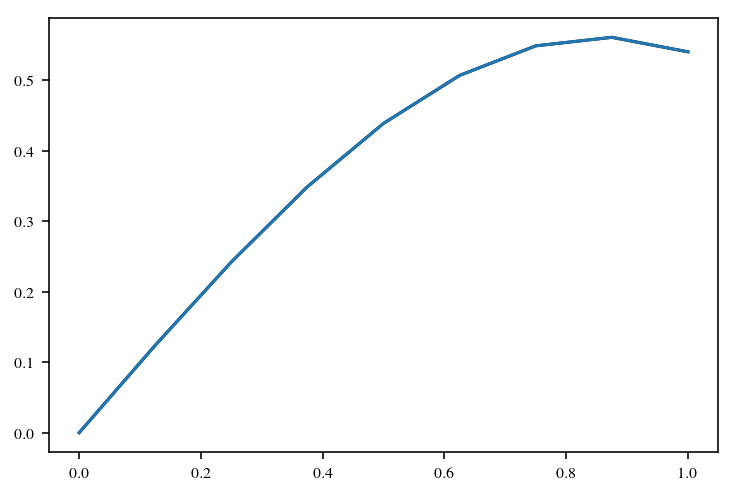

In [13]:
# local debugging cell: global testing part3
nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)
#print (nbn)
#print (boundarynodes)

def exact_fun(x):
    return x*np.cos(x)

A, b = treat_Dirichlet_boundary(A, b, Pb_trial, nbn, boundarynodes, Dirichlet_fun)
#print (A, b)

u = np.linalg.solve(A,b)
#print (u)
err = np.zeros(np.size(Pb_trial))
for i in range (np.size(Pb_trial)):
    err[i] = np.abs(u[i] - exact_fun(Pb_trial[i]))
print (np.max(err))

plt.plot(Pb_trial, u, 'k')
plt.plot(Pb_trial, Pb_trial*np.cos(Pb_trial))
plt.show()

### Summary (Framework)
Now, we can put everthing together into the following framework:
```python
def Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
        basis_type, Gpn, coeff_fun, source_fun, Dirichlet_fun, exact_fun)
```
- Generate the mesh information matrices: $P, T, E$;
- Generate the finite element information matrices: $P_b, T_b, E_b$;
- Assembel the matrices and vectors: local assembly based on $P, T, E$ only, local to global needs $P_b, T_b, E_b$;
- Deal with the boundary conditions: boundary information matrix and local assembly;
- Solve linear systems: numerical linear algebra.

In [14]:
def Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                     generate_boundarynodes_1D, basis_type,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, exact_fun):
    # P, T matrice
    P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

    basis_type_trial = basis_type
    basis_type_test  = basis_type

    # Nlb, number of local basis
    Nlb_trial = generate_Nlb(basis_type_trial)
    Nlb_test  = generate_Nlb(basis_type_test)
    Nb_trial, Pb_trial, Tb_trial = generate_NbPbTb_1D(P, T, basis_type_trial)
    Nb_test,  Pb_test,  Tb_test  = generate_NbPbTb_1D(P, T, basis_type_test)

    # Gauss point number
    Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    
    # Assemble local to global
    A = assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, 
                       P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, 1, basis_type_test, 1)
    b = assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, 0)
    
    # deal with boundary
    nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)
    # Dirichlet boundary
    A, b = treat_Dirichlet_boundary(A, b, Pb_trial, nbn, boundarynodes, Dirichlet_fun)
    
    # solve the solution
    u = np.linalg.solve(A,b)
    #print (u)
    
    # maximum error at nodes 
    err = np.zeros(np.size(Pb_trial))
    for i in range (np.size(Pb_trial)):
        err[i] = np.abs(u[i] - exact_fun(Pb_trial[i]))
    
    return np.max(err), Pb_trial, u
#
err, Pb, u = Poisson1D_solver(left_boundary, right_boundary, number_of_elements, 
                     generate_boundarynodes_1D, 102,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, exact_fun)
print ("maximum error:  %7.2e" % err)

maximum error:  4.66e-05


__Example 1__ 

Use the 1D linear finite element method to solve the following equation:
\begin{align*}
     -\frac{d}{dx}\left(e^x\frac{d u(x)}{dx}\right) &= -e^x[\cos(x)-2\sin(x)-x\cos(x) - x\sin(x)],\,\, (0 \leq x \leq 1), \\
     u(0) &= 0,\,\,u(1) = \cos(1).
\end{align*}
- The analytic solution of this problem is $u = x\cos(x)$, which can be used to compute the error of the numerical solution.
- Second order convergence $\mathcal{O}(h^2)$ since the error is reduced by $1$ when $h$ is reduced by half.
- This matches the optimal approximation capability expected from piecewise linear functions.

In [15]:
# function to output formatted order table
def print_OrderTable(number_coarse, err):
    print ("h      maximum error    order")
    for i in range(np.size(err)):
        number_of_elements = number_coarse*2**i
        if (i == 0):
            print ("1/%-3d    %7.2e        --" % (number_of_elements, err[i]))
        else:
            print ("1/%-3d    %7.2e       %4.2f" % (number_of_elements, err[i], np.log(err[i-1]/err[i])/np.log(2)))

h      maximum error    order
1/4      2.33e-03        --
1/8      5.83e-04       2.00
1/16     1.46e-04       1.99
1/32     3.67e-05       2.00
1/64     9.17e-06       2.00
1/128    2.29e-06       2.00


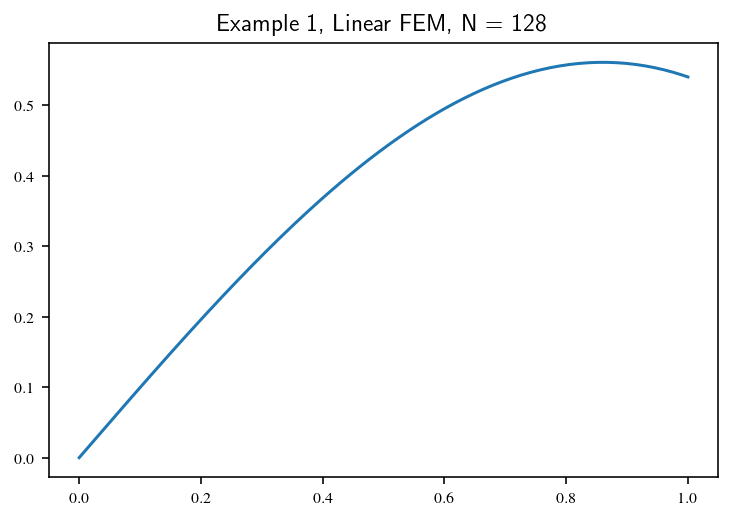

In [16]:
left_boundary_ex1 = 0
right_boundary_ex1 = 1

Gpn = 6 

def coeff_fun_ex1(x):
    return np.exp(x) 

def source_fun_ex1(x):
    return -np.exp(x)*(np.cos(x)-2*np.sin(x)-x*np.cos(x)-x*np.sin(x))

def generate_boundarynodes_1D_ex1(Pb):
    nbn = 2
    boundarynodes = np.zeros([2,nbn],dtype=int)
    # boundarynodes[0,i] = 0, Dirichlet
    boundarynodes[1,0] = 0
    boundarynodes[1,1] = np.size(Pb)-1
    return nbn, boundarynodes

def Dirichlet_fun_ex1(x):
    tiny = 1.e-12
    if (x <= left_boundary_ex1 + tiny):
        return 0.
    elif (x >= right_boundary_ex1 - tiny):
        return np.cos(1)

def exact_fun_ex1(x):
    return x*np.cos(x)

number_coarse = 4
basis_type = 101

err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                                     generate_boundarynodes_1D_ex1, basis_type,\
                                     Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex1, exact_fun_ex1)    
print_OrderTable(number_coarse, err)
plt.plot(Pb, u)
plt.title("Example 1, Linear FEM, N = %3d" % number_of_elements)
plt.show()

__Example 2__

Use the 1D quadratric finite element method to solve the following equation:
\begin{align*}
    -\frac{d}{dx}\left(e^x\frac{d u(x)}{dx}\right) &= -e^x[\cos(x)-2\sin(x)-x\cos(x) - x\sin(x)],\,\, (0 \leq x \leq 1), \\
    u(0) &= 0,\,\,u(1) = \cos(1).
\end{align*}
- The analytic solution of this problem is $u = x\cos(x)$, which can be used to compute the error of the numerical solution.
- Third order convergence $\mathcal{O}(h^3)$ since the error is reduced by $1$ when $h$ is reduced by half.
- This matches the optimal approximation capability expected from piecewise quadratric functions.
- In fact, we observe superconvergence since the convergence order is almost $\mathcal{O}(h^4)$

h      maximum error    order
1/4      4.66e-05        --
1/8      2.99e-06       3.96
1/16     1.89e-07       3.98
1/32     1.19e-08       3.99
1/64     7.44e-10       4.00
1/128    4.67e-11       3.99


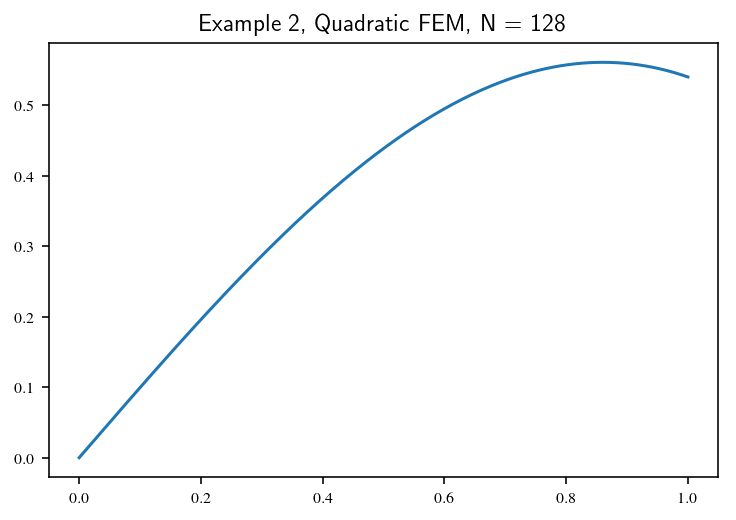

In [17]:
number_coarse = 4
basis_type = 102

err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                                    generate_boundarynodes_1D_ex1, basis_type,\
                                    Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex1, exact_fun_ex1)
print_OrderTable(number_coarse, err)
plt.plot(Pb, u)
plt.title("Example 2, Quadratic FEM, N = %3d" % number_of_elements)
plt.show()

### Extensions
#### Neumann boundary conditions
Consider 1D elliptic problem with Neumann boundary conditions:
\begin{align}
   -\frac{d}{dx}\left(c(x)\frac{d u(x)}{dx}\right) & = f(x),\,\, a < x < b \\
   u(a) = g_a,\,\,u'(b) & = r_b;\quad\text{or}\quad u'(a) = r_a,\,\,u(b) = g_b.
\end{align}
- Recall the weak formulation, we have:
\begin{equation}
    c(a)u'(a)v(a) - c(b)u'(b)v(b) + \int_a^b cu'v'dx = \int_a^b fv dx.
\end{equation}
- If $x = a$ is the Neumann boundary:
\begin{equation}
     \int_a^b cu'v'dx = \int_a^b fv dx - r_a*c(a)v(a).
\end{equation}
- If $x = b$ is the Neumann boundary:
\begin{equation}
     \int_a^b cu'v'dx = \int_a^b fv dx + r_b*c(b)v(b).
\end{equation}
- If both $x = a$ and $x = b$ are the Neumann boundary, what is __wrong__?
- Therefore, for Neumann boundary conditions, one only needs to change the assembly vector.  
```python
    def Neumann_fun(x)
    def treat_Neumann_boundary(b, Pb, nbn, boundarynodes, \
                                coeff_fun, Neumann_fun)
```
Since the left and right boundaries are slightly different , $boundarynodes[2,:]$ needs to store the correspond information. 

In [18]:
def generate_boundarynodes_1D_ex3(Pb):
    nbn = 2
    boundarynodes = np.zeros([3,nbn],dtype=int)
    # boundarynodes[0,i] = 0, Dirichlet; boundarynodes[1,i] = 1, Neumann
    boundarynodes[1,0] = 0
    # assume right boundary is Neumann
    # add the third row to boundarynodes: 0, left; 1 right.
    boundarynodes[0,1] = 1
    boundarynodes[1,1] = np.size(Pb)-1
    boundarynodes[2,1] = 1
    return nbn, boundarynodes

nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)

def Dirichlet_fun(x):
    if (x <= left_boundary+1.e-10):
        return 0.

def Neumann_fun(x):
    if (x >= right_boundary-1.e-10):
        return np.cos(1) - np.sin(1)
    
def treat_Neumann_boundary(b, Pb, nbn, boundarynodes, coeff_fun, Neumann_fun):
    for k in range(nbn):
        if (boundarynodes[0,k] == 1):
            i = boundarynodes[1,k]
            if (boundarynodes[2,k] == 1):
                b[i] += coeff_fun(Pb[i])*Neumann_fun(Pb[i])
            elif (boundarynodes[2,k] == 0):
                b[i] += -coeff_fun(Pb[i])*Neumann_fun(Pb[i])
    return b

In [19]:
def Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                     generate_boundarynodes_1D, basis_type,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, Neumann_fun, exact_fun):
    # P, T matrice
    P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

    basis_type_trial = basis_type
    basis_type_test  = basis_type

    # Nlb, number of local basis
    Nlb_trial = generate_Nlb(basis_type_trial)
    Nlb_test  = generate_Nlb(basis_type_test)
    Nb_trial, Pb_trial, Tb_trial = generate_NbPbTb_1D(P, T, basis_type_trial)
    Nb_test,  Pb_test,  Tb_test  = generate_NbPbTb_1D(P, T, basis_type_test)

    # Gauss point number
    Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    
    # Assemble local to global
    A = assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, 
                       P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, 1, basis_type_test, 1)
    b = assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, 0)
    
    # deal with boundary
    nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)
    # Dirichlet boundary
    A, b = treat_Dirichlet_boundary(A, b, Pb_trial, nbn, boundarynodes, Dirichlet_fun)
    # Neumann boundary
    b = treat_Neumann_boundary(b, Pb_trial, nbn, boundarynodes, coeff_fun, Neumann_fun)
    
    # solve the solution
    u = np.linalg.solve(A,b)
    #print (u)
    
    # maximum error at nodes 
    err = np.zeros(np.size(Pb_trial))
    for i in range (np.size(Pb_trial)):
        err[i] = np.abs(u[i] - exact_fun(Pb_trial[i]))
    
    return np.max(err), Pb_trial, u
#
err, Pb, u = Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                     generate_boundarynodes_1D_ex3, 102,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, Neumann_fun, exact_fun)
print ("maximum error: %7.2e" % err)

maximum error: 4.71e-11


__Example 3__
    
Use the 1D linear and quadratric finite element method to solve the following equation:
\begin{align*}
     -\frac{d}{dx}\left(e^x\frac{d u(x)}{dx}\right) &= -e^x[\cos(x)-2\sin(x)-x\cos(x) - x\sin(x)],\,\, (0 \leq x \leq 1), \\
     u(0) &= 0,\,\,u'(1) = \cos(1) - \sin(1).
\end{align*}
- The analytic solution of this problem is $u = x\cos(x)$, which can be used to compute the error of the numerical solution.

Linear Finite Element: 
h      maximum error    order
1/4      6.79e-03        --
1/8      1.70e-03       2.00
1/16     4.24e-04       2.00
1/32     1.06e-04       2.00
1/64     2.65e-05       2.00
1/128    6.62e-06       2.00
Quadratic Finite Element: 
h      maximum error    order
1/4      4.88e-05        --
1/8      3.06e-06       3.99
1/16     1.92e-07       4.00
1/32     1.20e-08       4.00
1/64     7.49e-10       4.00
1/128    4.71e-11       3.99


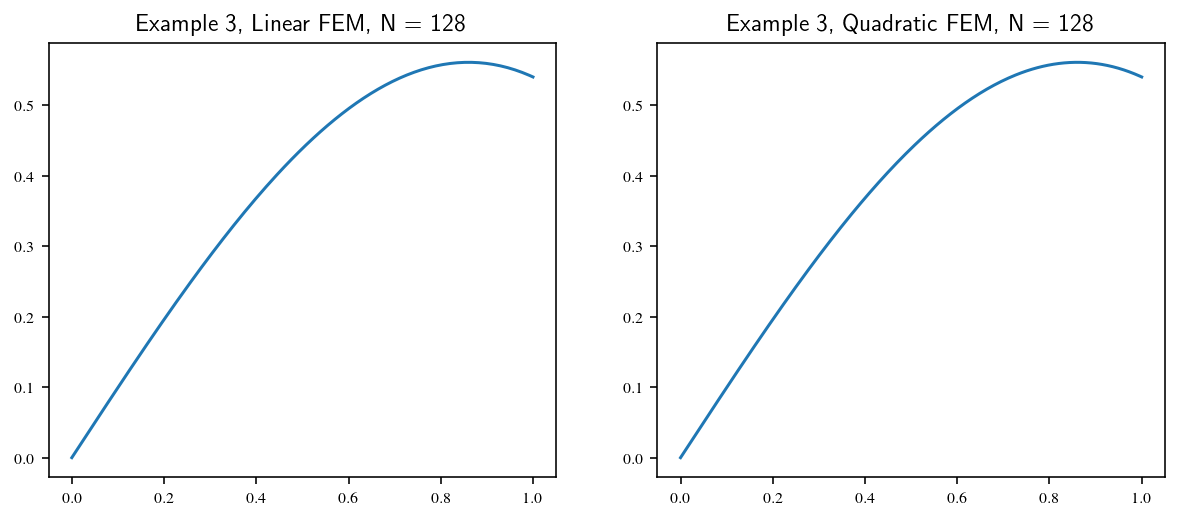

In [20]:
def Dirichlet_fun_ex3(x):
    tiny = 1.e-12
    if (x <= left_boundary_ex1 + tiny):
        return 0.
    
def Neumann_fun_ex3(x):
    tiny = 1.e-12
    if (x >= right_boundary - tiny):
        return np.cos(1) - np.sin(1)
    
number_coarse = 4
basis_type = 101
print ("Linear Finite Element: ")
err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                        generate_boundarynodes_1D_ex3, basis_type,\
                        Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex3, Neumann_fun_ex3, exact_fun_ex1)
print_OrderTable(number_coarse, err)    
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Pb, u)
ax1.set_title("Example 3, Linear FEM, N = %3d" % number_of_elements)

basis_type = 102
print ("Quadratic Finite Element: ")
err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                        generate_boundarynodes_1D_ex3, basis_type,\
                        Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex3, Neumann_fun_ex3, exact_fun_ex1)
print_OrderTable(number_coarse, err)    
ax2 = fig.add_subplot(1,2,2)
ax2.plot(Pb, u)
ax2.set_title("Example 3, Quadratic FEM, N = %3d" % number_of_elements)
plt.show()

#### Robin boundary conditions
Consider 1D elliptic problem with Robin boundary conditions:
\begin{align}
   -\frac{d}{dx}\left(c(x)\frac{d u(x)}{dx}\right) & = f(x),\,\, a < x < b \\
   u'(a) + q_a u(a) = p_a,\,\,u(b) & = g_b;\quad\text{or}\quad u(a) = g_a,\,\,u'(b) + q_b u(b) = p_b.
\end{align}
- Recall the weak formulation, we have:
\begin{equation}
    c(a)u'(a)v(a) - c(b)u'(b)v(b) + \int_a^b cu'v'dx = \int_a^b fv dx.
\end{equation}
- If $x = a$ is the Robin boundary:
\begin{equation}
     \int_a^b cu'v'dx - q_a c(a)u(a)= \int_a^b fv dx - p_ac(a)v(a).
\end{equation}
- If $x = b$ is the Robin boundary:
\begin{equation}
     \int_a^b cu'v'dx + q_b c(b)u(b)= \int_a^b fv dx + p_bc(b)v(b).
\end{equation}
- Therefore, for Robin boundary conditions, one only needs to change the both assembly matrix and vector.  
```python
    def Robin_fun(x)
    def Robin_coeff(x)
    def treat_Robin_boundary(A, b, Pb, nbn, boundarynodes, coeff_fun, \
                            Robin_fun, Robin_coeff)
```

In [21]:
def generate_boundarynodes_1D_ex4(Pb):
    nbn = 2
    boundarynodes = np.zeros([3,nbn],dtype=int)
    # boundarynodes[0,i] = 0, Dirichlet; 1, Neumann; 2, Robin
    # assume left boundary: Robin, right boundary: Dirichlet
    # add the third row to boundarynodes: 0, left; 1 right.
    boundarynodes[0,0] = 2
    boundarynodes[2,0] = 0
    boundarynodes[1,0] = 0
    boundarynodes[1,1] = np.size(Pb)-1
    return nbn, boundarynodes

nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)

def Dirichlet_fun(x):
    if (x >= right_boundary-1.e-10):
        return np.cos(1)

def Robin_fun(x):
    if (x <= left_boundary+1.e-10):
        return 1.

def Robin_coeff(x): 
    if (x <= left_boundary+1.e-10):
        return 1.

def treat_Robin_boundary(A, b, Pb, nbn, boundarynodes, coeff_fun, Robin_fun, Robin_coeff):
    for k in range(nbn):
        if (boundarynodes[0,k] == 2):
            i = boundarynodes[1,k]
            if (boundarynodes[2,k] == 0):
                A[i,i] += -Robin_coeff(Pb[i])*coeff_fun(Pb[i])
                b[i] += -coeff_fun(Pb[i])*Robin_fun(Pb[i])
            elif (boundarynodes[2,k] == 1):
                A[i,i] += Robin_coeff(Pb[i])*coeff_fun(Pb[i])
                b[i] += coeff_fun(Pb[i])*Robin_fun(Pb[i])
    return A, b

In [22]:
def Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                     generate_boundarynodes_1D, basis_type,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, Neumann_fun, Robin_fun, Robin_coeff, exact_fun):
    # P, T matrice
    #print (number_of_elements)
    P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

    basis_type_trial = basis_type
    basis_type_test  = basis_type

    # Nlb, number of local basis
    Nlb_trial = generate_Nlb(basis_type_trial)
    Nlb_test  = generate_Nlb(basis_type_test)
    Nb_trial, Pb_trial, Tb_trial = generate_NbPbTb_1D(P, T, basis_type_trial)
    Nb_test,  Pb_test,  Tb_test  = generate_NbPbTb_1D(P, T, basis_type_test)

    # Gauss point number
    Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    
    # Assemble local to global
    A = assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, 
                       P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, 1, basis_type_test, 1)
    b = assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, 0)
    
    # deal with boundary
    nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)
    # Dirichlet boundary
    A, b = treat_Dirichlet_boundary(A, b, Pb_trial, nbn, boundarynodes, Dirichlet_fun)
    # Neumann boundary
    b = treat_Neumann_boundary(b, Pb_trial, nbn, boundarynodes, coeff_fun, Neumann_fun)
    # Robin boundary
    A, b = treat_Robin_boundary(A, b, Pb_trial, nbn, boundarynodes, coeff_fun, Robin_fun, Robin_coeff)
    
    # solve the solution
    u = np.linalg.solve(A,b)
    #print (u)
    
    # maximum error at nodes 
    err = np.zeros(np.size(Pb_trial))
    for i in range (np.size(Pb_trial)):
        err[i] = np.abs(u[i] - exact_fun(Pb_trial[i]))
    
    return np.max(err), Pb_trial, u
#
err, Pb, u = Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                    generate_boundarynodes_1D_ex4, 102,\
                    Gpn, coeff_fun, source_fun, Dirichlet_fun, Neumann_fun, Robin_fun, Robin_coeff, exact_fun)
print ("maximum error: %7.2e" % err)

maximum error: 3.08e-11


__Example 4__

Use the 1D linear and quadratric finite element method to solve the following equation:
\begin{align*}
     -\frac{d}{dx}\left(e^x\frac{d u(x)}{dx}\right) &= -e^x[\cos(x)-2\sin(x)-x\cos(x) - x\sin(x)],\,\, (0 \leq x \leq 1), \\
     u'(0) + u(0) &= 1,\,\,u(1) = \cos(1).
\end{align*}
- The analytic solution of this problem is $u = x\cos(x)$, which can be used to compute the error of the numerical solution.

Linear Finite Element: 
h      maximum error    order
1/4      1.83e-02        --
1/8      4.60e-03       1.99
1/16     1.15e-03       2.00
1/32     2.88e-04       2.00
1/64     7.20e-05       2.00
1/128    1.80e-05       2.00
Quadratic Finite Element: 
h      maximum error    order
1/4      3.28e-05        --
1/8      2.05e-06       4.00
1/16     1.28e-07       4.00
1/32     8.01e-09       4.00
1/64     5.00e-10       4.00
1/128    3.08e-11       4.02


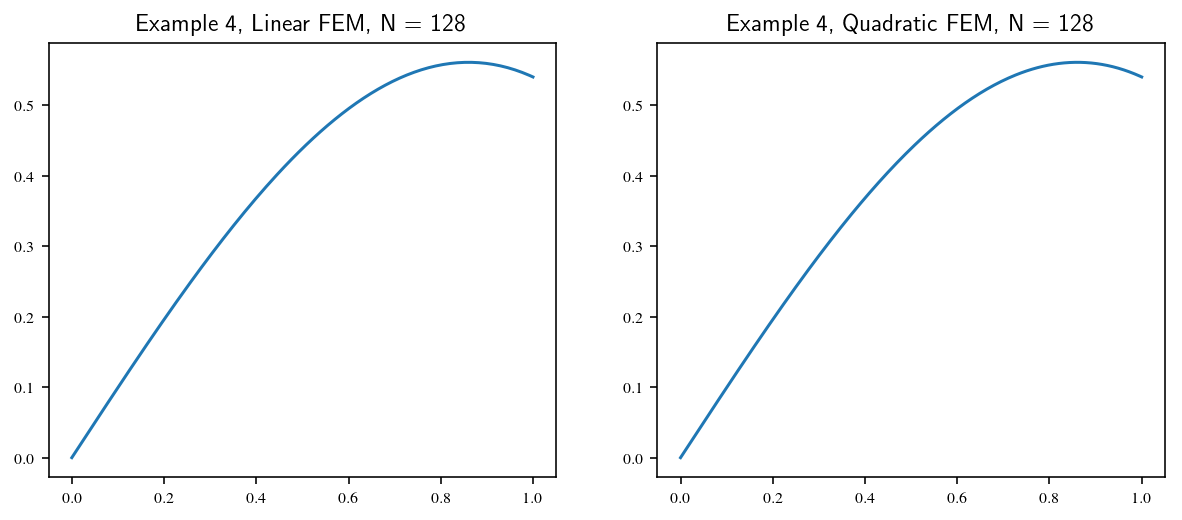

In [23]:
def Dirichlet_fun_ex4(x):
    tiny = 1.e-12
    if (x >= right_boundary_ex1 - tiny):
        return np.cos(1)
    
def Robin_fun_ex4(x):
    tiny = 1.e-12
    if (x <= left_boundary + tiny):
        return 1

def Robin_coeff_ex4(x):
    tiny = 1.e-12
    if (x <= left_boundary + tiny):
        return 1

number_coarse = 4
basis_type = 101
print ("Linear Finite Element: ")
err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                        generate_boundarynodes_1D_ex4, basis_type,\
                        Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex4, Neumann_fun_ex3, \
                        Robin_fun_ex4, Robin_coeff_ex4, exact_fun_ex1)
print_OrderTable(number_coarse, err)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Pb, u)
ax1.set_title("Example 4, Linear FEM, N = %3d" % number_of_elements)

basis_type = 102
print ("Quadratic Finite Element: ")
err = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    err[i], Pb, u = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                            generate_boundarynodes_1D_ex4, basis_type,\
                            Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex4, Neumann_fun_ex3, \
                            Robin_fun_ex4, Robin_coeff_ex4, exact_fun_ex1)
print_OrderTable(number_coarse, err)    
ax2 = fig.add_subplot(1,2,2)
ax2.plot(Pb, u)
ax2.set_title("Example 4, Quadratic FEM, N = %3d" % number_of_elements)
plt.show()

#### Measurements for Errors
In above examples, we have considered the maximum error of the approximation on the finite element __nodes__.  However, we should point out it is not a proper measurement for errors.  It is the reason that the quadratic basis funcions lead to convergence rate of $\mathcal{O}(h^4)$, the so-called superconvergence (sort of cheating).  The common measurements (norms) for errors are the following: 
- $L^\infty$ norm error:
$$ \|u - u_h\|_{\infty} =\sup\limits_{x\in \Omega}|u(x)- u_h(x)|. $$
- $L^2$ norm error:
$$ \|u - u_h\|_{0} = \left(\int_{\Omega}|u - u_h|^2 dx\right)^{\frac{1}{2}}.$$
- $H^1$ semi-norm error:
$$ |u - u_h|_{1} = \left(\int_{\Omega}|u' - u'_h|^2 dx\right)^{\frac{1}{2}}.$$
- $H^1$ norm error:
$$ |u - u_h|_{1} = \left(\int_{\Omega}|u - u_h|^2 dx + \int_{\Omega}|u' - u'_h|^2 dx\right)^{\frac{1}{2}}.$$

#### Evaluation of Finite Element Solution
By solving the final linear system, we obtain the unknonw coefficients for the basis form of the approximation $u_h$,
\begin{equation}
    u_h(x) = \sum\limits_{j = 1}^{N_b}u_j\phi_j(x),
\end{equation}
however, the local basis functions we defined are for the local basis form of $u_h$ 
\begin{equation}
    u_h(x) = \sum\limits_{n = 1}^N\sum\limits_{i=1}^{N_{lb}}u_{n,i}\phi_{n,i}(x).
\end{equation}
Then, the question is how should we translate $\left\{u_j\right\}$ to $\left\{u_{n,i}\right\}$. 
- Based on the information matrix $T_b$, we have the following relation:
    $$ u_{n,i} = u_{T_b[i,n]}.$$
- For $x \in I_n$, we have 
    $$ u_h(x) = \sum\limits_{i=1}^{N_{lb}} u_{T_b[i,n]}\phi_{n,i}(x).$$

In [24]:
def point_location(x, P):
    tiny = 1.e-10
    for n in range(np.size(P)-1):
        if (P[n] - tiny <= x and x <= P[n+1] -tiny):
            return n
    return np.size(P)-2

def FE_solution(x, u, P, T, Tb, basis_type, Nlb, der_order):
    result = 0.
    n = point_location(x, P)
    vertices = P[T[0,n]:T[1,n]+1]
    for i in range(Nlb):
        result += u[Tb[i,n]]*local_basis_1D(x, vertices, basis_type, i, der_order)
    return result

In [25]:
def exact_fun_ex1(x, der_order):
    if (der_order == 0):
        return x*np.cos(x)
    elif (der_order == 1):
        return np.cos(x) - x*np.sin(x)

In [26]:
def norm(u, P, T, Tb, basis_type, Nlb, exact_fun, Gpn, norm_type = 'L2'):
    Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    err = 0.
    for n in range(np.size(P)-1):
        vertices = P[T[0,n]:T[1,n]+1]
        Gauss_points, Gauss_weights=generate_Gauss1D(vertices, Gauss_points_ref, Gauss_weights_ref)
        if (norm_type == 'L2'):
            for k in range (Gpn):
                 err += Gauss_weights[k]*(exact_fun(Gauss_points[k],0) - \
                        FE_solution(Gauss_points[k], u, P, T, Tb, basis_type, Nlb, 0))**2
        elif (norm_type == 'H1'):  
            for k in range (Gpn):
                 err += Gauss_weights[k]*(exact_fun(Gauss_points[k],1) - \
                        FE_solution(Gauss_points[k], u, P, T, Tb, basis_type, Nlb, 1))**2
        elif (norm_type == 'Linf'):
            for k in range (Gpn):
                err = max(err, np.abs(exact_fun(Gauss_points[k],0) - \
                        FE_solution(Gauss_points[k], u, P, T, Tb, basis_type, Nlb, 0)))
    if (norm_type == 'L2' or norm_type == 'H1'):
        return np.sqrt(err)
    elif (norm_type == 'Linf'):
        return err

In [27]:
def Poisson1D_solver(left_boundary, right_boundary, number_of_elements, \
                     generate_boundarynodes_1D, basis_type,\
                     Gpn, coeff_fun, source_fun, Dirichlet_fun, Neumann_fun, Robin_fun, Robin_coeff):
    # P, T matrice
    #print (number_of_elements)
    P, T = generate_PT_1D(left_boundary, right_boundary, number_of_elements)

    basis_type_trial = basis_type
    basis_type_test  = basis_type

    # Nlb, number of local basis
    Nlb_trial = generate_Nlb(basis_type_trial)
    Nlb_test  = generate_Nlb(basis_type_test)
    Nb_trial, Pb_trial, Tb_trial = generate_NbPbTb_1D(P, T, basis_type_trial)
    Nb_test,  Pb_test,  Tb_test  = generate_NbPbTb_1D(P, T, basis_type_test)

    # Gauss point number
    Gauss_points_ref, Gauss_weights_ref = npleg.leggauss(Gpn)
    
    # Assemble local to global
    A = assemble_matrix_1D(coeff_fun, Gauss_points_ref, Gauss_weights_ref, 
                       P, T, Tb_trial, Tb_test, Nlb_trial, Nlb_test, Nb_trial, Nb_test,\
                       basis_type_trial, 1, basis_type_test, 1)
    b = assemble_vector_1D(source_fun, Gauss_points_ref, Gauss_weights_ref, \
                       P, T, Tb_test, Nlb_test, Nb_test, basis_type_test, 0)
    
    # deal with boundary
    nbn, boundarynodes = generate_boundarynodes_1D(Pb_trial)
    # Dirichlet boundary
    A, b = treat_Dirichlet_boundary(A, b, Pb_trial, nbn, boundarynodes, Dirichlet_fun)
    # Neumann boundary
    b = treat_Neumann_boundary(b, Pb_trial, nbn, boundarynodes, coeff_fun, Neumann_fun)
    # Robin boundary
    A, b = treat_Robin_boundary(A, b, Pb_trial, nbn, boundarynodes, coeff_fun, Robin_fun, Robin_coeff)
    
    # solve the solution
    u = np.linalg.solve(A,b)
    #print (u)
    
    return u, P, T, Pb_trial, Tb_trial
#
u, P, T, Pb, Tb = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                    generate_boundarynodes_1D_ex1, 102,\
                    Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex1, Neumann_fun_ex3, Robin_fun_ex4, Robin_coeff_ex4)
#for i in range (np.size(Pb)):
#    print (u[i] - FE_solution(Pb[i], u, P, T, Tb, 102, 3, 0))
print (norm(u, P, T, Tb, 102, 3, exact_fun_ex1, Gpn, norm_type = 'Linf'))

1.1116609983886569e-08


In [28]:
# function to output formatted order table
def print_OrderTable3(number_coarse, erri, err2, err1):
    print (" h    Linf norm  order  L2 norm  order  H1 semi  order")
    for i in range(np.size(erri)):
        number_of_elements = number_coarse*2**i
        if (i == 0):
            print ("1/%-3d  %7.2e   --   %7.2e   --   %7.2e   --" % \
                   (number_of_elements, erri[i], err2[i], err1[i]))
        else:
            print ("1/%-3d  %7.2e  %4.2f  %7.2e  %4.2f  %7.2e  %4.2f" % \
                       (number_of_elements, \
                        erri[i], np.log(erri[i-1]/erri[i])/np.log(2),\
                        err2[i], np.log(err2[i-1]/err2[i])/np.log(2),\
                        err1[i], np.log(err1[i-1]/err1[i])/np.log(2)))

__Example 1 in Different Measurements__

In [29]:
number_coarse = 4
basis_type = 101

err1 = np.zeros(6)
err2 = np.zeros(6)
erri = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    u, P, T, Pb, Tb = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                                     generate_boundarynodes_1D_ex1, basis_type,\
                                     Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex1, Neumann_fun_ex3, Robin_fun_ex4, Robin_coeff_ex4)
    err1[i] = norm(u, P, T, Tb, basis_type, 2, exact_fun_ex1, Gpn, norm_type = 'H1')
    err2[i] = norm(u, P, T, Tb, basis_type, 2, exact_fun_ex1, Gpn, norm_type = 'L2')
    erri[i] = norm(u, P, T, Tb, basis_type, 2, exact_fun_ex1, Gpn, norm_type = 'Linf')
print_OrderTable3(number_coarse, erri, err2, err1)

 h    Linf norm  order  L2 norm  order  H1 semi  order
1/4    1.49e-02   --   7.20e-03   --   1.05e-01   --
1/8    3.91e-03  1.93  1.80e-03  2.00  5.27e-02  1.00
1/16   1.00e-03  1.97  4.49e-04  2.00  2.64e-02  1.00
1/32   2.53e-04  1.98  1.12e-04  2.00  1.32e-02  1.00
1/64   6.36e-05  1.99  2.80e-05  2.00  6.59e-03  1.00
1/128  1.60e-05  2.00  7.01e-06  2.00  3.30e-03  1.00


__Example 2 in Different Measurements__

In [30]:
number_coarse = 4
basis_type = 102

err1 = np.zeros(6)
err2 = np.zeros(6)
erri = np.zeros(6)
for i in range (6):
    number_of_elements = number_coarse*2**i
    u, P, T, Pb, Tb = Poisson1D_solver(left_boundary_ex1, right_boundary_ex1, number_of_elements, \
                                     generate_boundarynodes_1D_ex1, basis_type,\
                                     Gpn, coeff_fun_ex1, source_fun_ex1, Dirichlet_fun_ex1, Neumann_fun_ex3, Robin_fun_ex4, Robin_coeff_ex4)
    err1[i] = norm(u, P, T, Tb, basis_type, 3, exact_fun_ex1, Gpn, norm_type = 'H1')
    err2[i] = norm(u, P, T, Tb, basis_type, 3, exact_fun_ex1, Gpn, norm_type = 'L2')
    erri[i] = norm(u, P, T, Tb, basis_type, 3, exact_fun_ex1, Gpn, norm_type = 'Linf')
print_OrderTable3(number_coarse, erri, err2, err1)

 h    Linf norm  order  L2 norm  order  H1 semi  order
1/4    3.86e-04   --   2.10e-04   --   5.42e-03   --
1/8    4.70e-05  3.04  2.61e-05  3.01  1.35e-03  2.00
1/16   5.78e-06  3.02  3.26e-06  3.00  3.38e-04  2.00
1/32   7.16e-07  3.01  4.08e-07  3.00  8.45e-05  2.00
1/64   8.91e-08  3.01  5.10e-08  3.00  2.11e-05  2.00
1/128  1.11e-08  3.00  6.37e-09  3.00  5.28e-06  2.00


__Conclusion:__

For using polynomial basis functions of degree $k$, $\mathbb{P}^k$:
- The $L^2$ norm and $L^\infty$ norm errors have convergence rate of $\mathcal{O}(h^{k+1})$
- The $H^1$ norm and $H^1$ semi-norm errors have convergence rate of $\mathcal{O}(h^{k})$
- The superconvergence of node errors normally can not be seen in general measurements, for superconvergence extracing one can see [tutorial](http:\\)